# Lens Calculator

In [1]:
import sympy as sym
from sympy.physics.mechanics import init_vprinting

init_vprinting()

In [2]:
# Curved interface matrix
def interface(ni, nf, R):
    return sym.Matrix([[1, 0], [(ni - nf)/(R*nf), ni/nf]])

# Distance matrix
def dist(d):
    return sym.Matrix([[1, d], [0, 1]])

# Lens matrix
# Use sym.oo for flat interface
def lens(n_medium=1, n_lens=1, R_in=sym.oo, R_out=sym.oo, thickness=5):
    interface_in = interface(n_medium, n_lens, R_in)
    interface_out = interface(n_lens, n_medium, R_out)
    lens_thickness = sym.Matrix([[1, thickness], [0, 1]])
    return interface_out @ lens_thickness @ interface_in

# Waist (radius) of beam and 
# angle with respect to x-axis
def beam(waist, angle):
    return sym.Matrix([[waist], [angle]])

In [3]:
# Beam waists
w0, wf = sym.symbols('w_0 w_f')

# Beam angle (small angles)
theta0, thetaf = sym.symbols('theta_0 theta_f')

# Distances
# For lens thickness
d0, d1, d2, d3, d4 = sym.symbols('d:5')
# For distance between lens
x0, x1, x2, x3, x4 = sym.symbols('x:5')

# Indicies of refraction
nl, nm = sym.symbols('n_l n_m')

# Radius of curvature for lens
r00, r01, r10, r11, r20, r21 = sym.symbols('r_{00} r_{01} r_{10} r_{11} r_{20} r_{21}')

In [4]:
beam0 = beam(w0, theta0)
beamf = beam(wf, thetaf)

dist0 = dist(x0)
lens0 = lens(nm, nl, r00, sym.oo, d0)
dist1 = dist(x1)
lens1 = lens(nm, nl, r10, sym.oo, d1)
dist2 = dist(x2)
lens2 = lens(nm, nl, r20, sym.oo, d2)

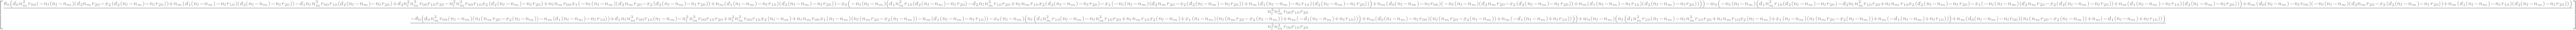

In [5]:
Final = (lens2@dist2@lens1@dist1@lens0@dist0@beam0).applyfunc(sym.simplify)

display(Final)

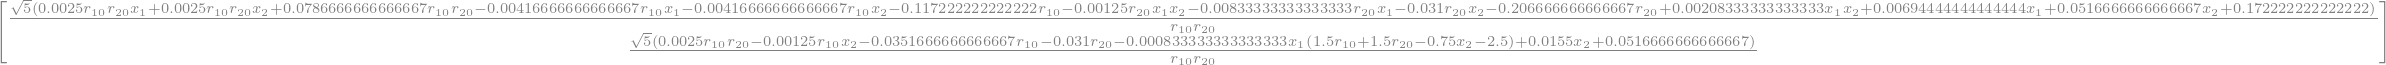

In [6]:
# Sub in the stuff we know
Final_sub1 = Final.subs({nm: 1, nl:1.5, r00:-50, 
                         x0:25, d0:7.2, d1:5, d2:5, 
                         theta0:sym.sqrt(5)/500, w0:0}).applyfunc(sym.simplify)
display(Final_sub1)

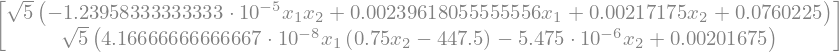

In [7]:
# Sub in the radius of curvatures
# for the lens we want to use 
Final_sub2 = Final_sub1.subs({r10:100, r20:200}).applyfunc(sym.simplify)
display(Final_sub2)

In [8]:
sym.solvers.solve(Final_sub2 - beamf.subs({wf:1.12, thetaf:0}), (x1, x2))